In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [131]:
df=pd.read_csv('/content/Airline_Delay_Cause.csv')

In [132]:
df.shape

(179338, 21)

In [133]:
df.columns.tolist()

['year',
 'month',
 'carrier',
 'carrier_name',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

Dataset overview


In [134]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [136]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,341
arr_del15,591
carrier_ct,341
weather_ct,341


# Handle missing values (341 rows)

In [137]:

df = df.dropna(subset=['arr_flights', 'arr_del15'])

# Convert delays to minutes
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay',
                'security_delay', 'late_aircraft_delay']
df[delay_columns] = df[delay_columns].fillna(0)

In [138]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [139]:
fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

# Derived metrics

In [140]:
# Derived metrics
df['delay_rate'] = df['arr_del15'] / df['arr_flights']
df['cancellation_rate'] = df['arr_cancelled'] / df['arr_flights']
df['avg_delay_per_flight'] = df['arr_delay'] / df['arr_flights']


# EDA
1. Total Flights by Month

Text(0, 0.5, 'Number of Flights')

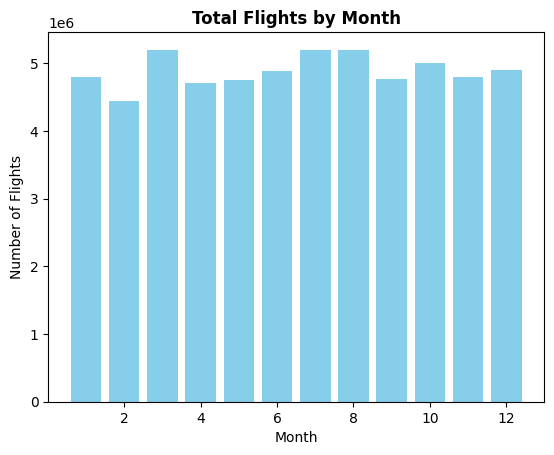

In [141]:

custom_palette = ["#e5cfc7", "#cc99a2", "#8a5a72", "#3d334a","#900047","#8E5B68","#673147"]
sns.set_palette(custom_palette)
#plt.subplot(3, 4, 1)
monthly_flights = df.groupby('month')['arr_flights'].sum()
plt.bar(monthly_flights.index, monthly_flights.values, color='skyblue')
plt.title('Total Flights by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Flights')

# 2. Average Delay Rate by Month

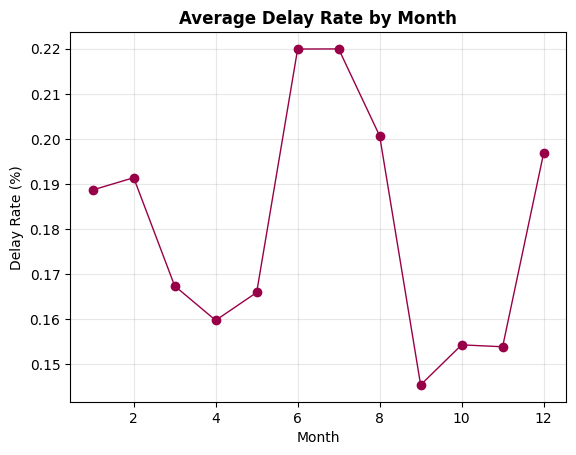

In [142]:


monthly_delay_rate = df.groupby('month')['delay_rate'].mean()
plt.plot(monthly_delay_rate.index, monthly_delay_rate.values, marker='o', color='#980047', linewidth=1)

plt.title('Average Delay Rate by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.grid(alpha=0.3)

3.Average Delay Rate by Month

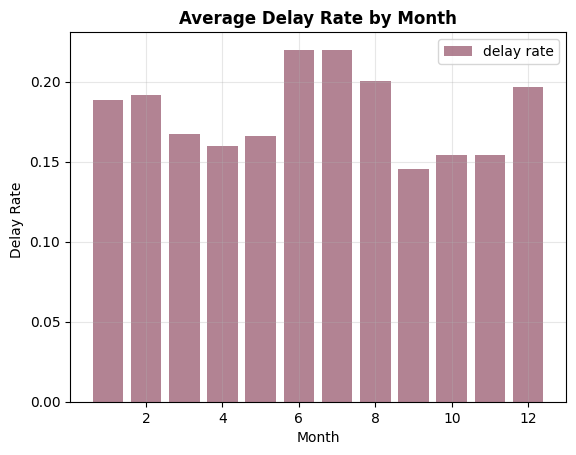

In [143]:
plt.bar(monthly_delay_rate.index, monthly_delay_rate.values, color='#80304C', alpha=0.6, label='delay rate')
plt.title('Average Delay Rate by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Delay Rate ')
plt.grid(alpha=0.3)
plt.legend()

In [144]:
print(f'total no. of carriers: {df["carrier"].unique().size}')
df['carrier'].unique()

total no. of carriers: 29


array(['9E', 'AA', 'OH', 'OO', 'WN', 'AS', 'DL', 'PT', 'QX', 'UA', 'YV',
       'B6', 'F9', 'G4', 'G7', 'HA', 'MQ', 'YX', 'ZW', 'C5', 'NK', 'EM',
       'EV', 'AX', 'CP', 'KS', '9K', 'VX', 'US'], dtype=object)

# 4. Top 10 Carriers by Delay Rate

Text(0.5, 0, 'Delay Rate')

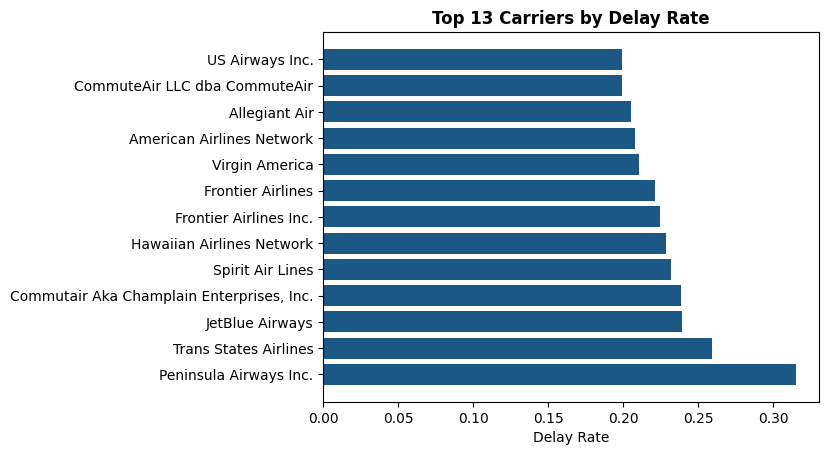

In [145]:


carrier_delays = df.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False)
top_carriers = carrier_delays.head(13)
plt.barh(range(len(top_carriers)), top_carriers.values, color='#1B5886')
plt.yticks(range(len(top_carriers)), top_carriers.index)
plt.title('Top 13 Carriers by Delay Rate', fontsize=12, fontweight='bold')
plt.xlabel('Delay Rate')

# 5. Top 13 Carriers by Delay Rate

Text(0.5, 0, 'Carrier')

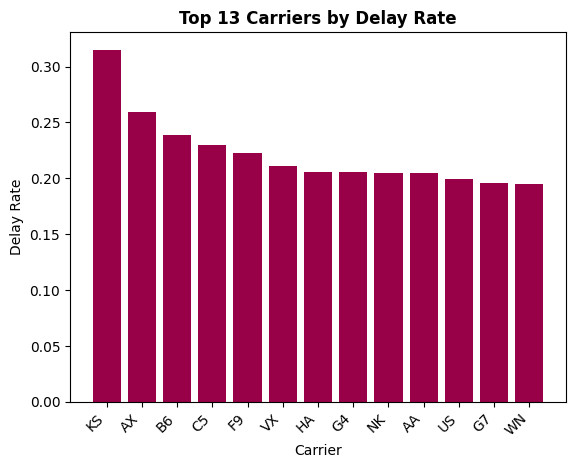

In [146]:
# 3. Top 13 Carriers by Delay Rate (Vertical Bars)
carrier_delays = df.groupby('carrier')['delay_rate'].mean().sort_values(ascending=False)
top_carriers = carrier_delays.head(13)

plt.bar(top_carriers.index, top_carriers.values, color='#980047')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.title('Top 13 Carriers by Delay Rate', fontsize=12, fontweight='bold')
plt.ylabel('Delay Rate')
plt.xlabel('Carrier')


In [147]:
print(f'total no. of carriers: {df["airport"].unique().size}')
df['airport'].unique()

total no. of carriers: 393


array(['ABE', 'AEX', 'AGS', 'ALB', 'ATL', 'ATW', 'AUS', 'AVL', 'AZO',
       'BDL', 'BGM', 'BGR', 'BHM', 'BMI', 'BNA', 'BOS', 'BTR', 'BTV',
       'BUF', 'BWI', 'CAE', 'CHA', 'CHO', 'CHS', 'CID', 'CLE', 'CLT',
       'CMH', 'CRW', 'CVG', 'CWA', 'DAY', 'DCA', 'DHN', 'DLH', 'DSM',
       'DTW', 'EWR', 'EYW', 'FAR', 'FAY', 'FLL', 'FSD', 'GFK', 'GNV',
       'GPT', 'GRB', 'GRR', 'GSO', 'GSP', 'GTR', 'HPN', 'HSV', 'IAD',
       'ICT', 'ILM', 'IND', 'ITH', 'JAN', 'JAX', 'JFK', 'LAN', 'LEX',
       'LFT', 'LGA', 'LIT', 'MCI', 'MDT', 'MEM', 'MGM', 'MIA', 'MKE',
       'MLI', 'MLU', 'MOB', 'MQT', 'MSN', 'MSP', 'MSY', 'MYR', 'OAJ',
       'OMA', 'ORD', 'ORF', 'ORH', 'PHL', 'PIT', 'PNS', 'PVD', 'PWM',
       'RDU', 'RIC', 'ROA', 'ROC', 'RST', 'RSW', 'SAV', 'SBN', 'SDF',
       'SGF', 'SHV', 'STL', 'SYR', 'TLH', 'TRI', 'TUL', 'TVC', 'TYS',
       'VLD', 'XNA', 'ABQ', 'AMA', 'ANC', 'AVP', 'BFL', 'BOI', 'BUR',
       'BZN', 'COS', 'DAB', 'DEN', 'DFW', 'ECP', 'MHT', 'MLB', 'OKC',
       'PHF', 'PIA',

# 6. Top 10 Airports by Delay Rate

Text(0.5, 0, 'Delay Rate (%)')

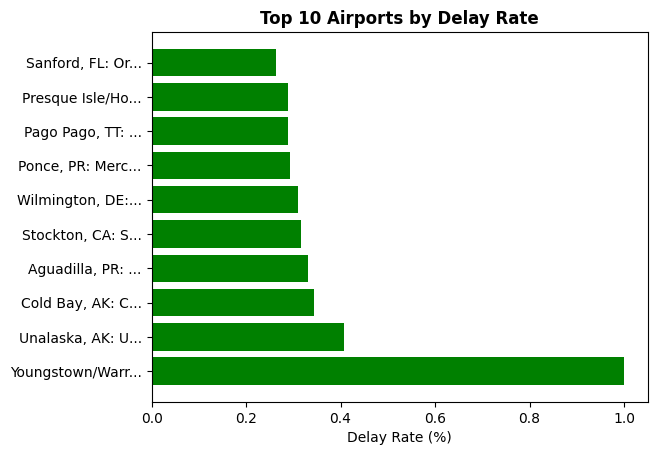

In [148]:

#plt.subplot(3, 4, 4)
airport_delays = df.groupby('airport_name')['delay_rate'].mean().sort_values(ascending=False)
top_airports = airport_delays.head(10)
labels = [name[:15] + '...' if len(name) > 15 else name for name in top_airports.index]
plt.barh(range(len(top_airports)), top_airports.values, color='green')
plt.yticks(range(len(top_airports)), labels)
plt.title('Top 10 Airports by Delay Rate', fontsize=12, fontweight='bold')
plt.xlabel('Delay Rate (%)')

Text(0.5, 0, 'Carrier')

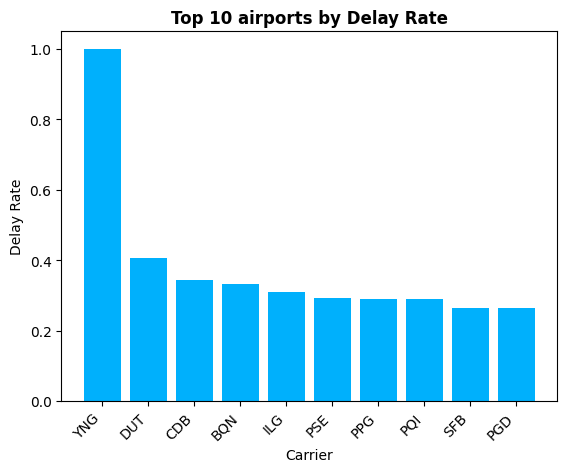

In [149]:
# 4. Top 10 Airports by Delay Rate
airport_delays = df.groupby('airport')['delay_rate'].mean().sort_values(ascending=False)
top_airports = airport_delays.head(10)
plt.bar(top_airports.index, top_airports.values, color='#00B0FC')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 airports by Delay Rate', fontsize=12, fontweight='bold')
plt.ylabel('Delay Rate')
plt.xlabel('Carrier')

# 7. Distribution of Delay Causes

Text(0.5, 1.0, 'Distribution of Delay Causes')

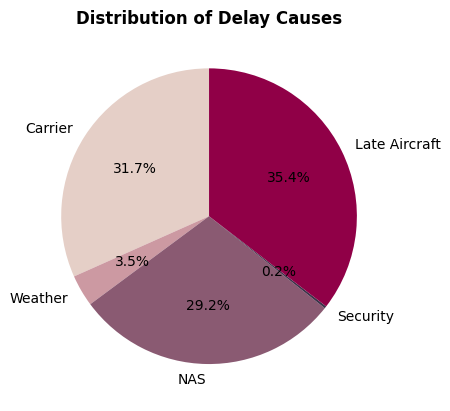

In [150]:
# 5. Distribution of Delay Causes
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
cause_labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
delay_sums = [df[cause].sum() for cause in delay_causes]
plt.pie(delay_sums, labels=cause_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Delay Causes', fontsize=12, fontweight='bold')


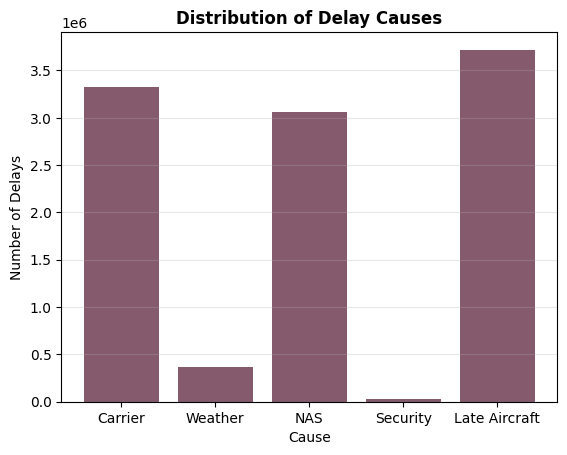

In [151]:
plt.bar(cause_labels, delay_sums, alpha=0.8,color="#673147")
plt.title('Distribution of Delay Causes', fontsize=12, fontweight='bold')
plt.xlabel('Cause')
plt.ylabel('Number of Delays')
plt.grid(axis='y', alpha=0.3)

# 8. Distribution of Delay Duration

Text(0.5, 1.0, 'Distribution of Delay Duration')

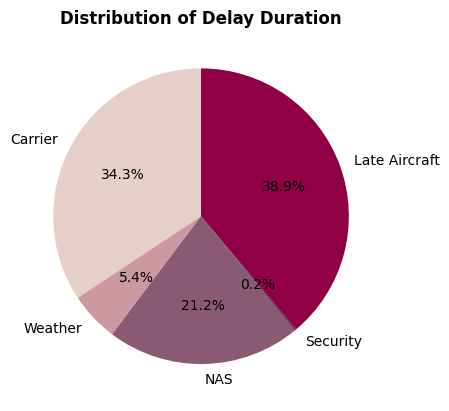

In [152]:
# 6. Distribution of Delay Duration
delay_durations = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
duration_sums = [df[duration].sum() for duration in delay_durations]
plt.pie(duration_sums, labels=cause_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Delay Duration', fontsize=12, fontweight='bold')


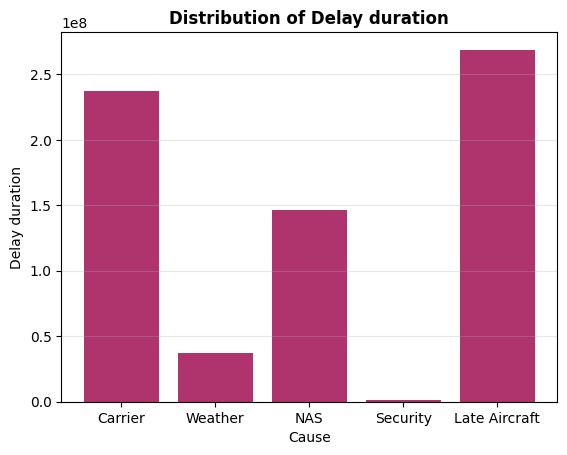

In [153]:
plt.bar(cause_labels, duration_sums, alpha=0.8,color="#9B0047")
plt.title('Distribution of Delay duration', fontsize=12, fontweight='bold')
plt.xlabel('Cause')
plt.ylabel('Delay duration')
plt.grid(axis='y', alpha=0.3)

# 9. Seasonal Delay Trends

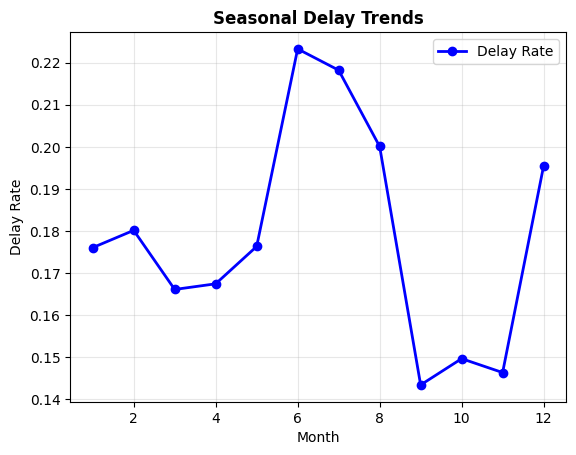

In [154]:
# 7. Seasonal Delay Trends

seasonal = df.groupby('month').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'sum'
})
seasonal['delay_rate'] = seasonal['arr_del15'] / seasonal['arr_flights']
plt.plot(seasonal.index, seasonal['delay_rate'], marker='o', linewidth=2, label='Delay Rate',color='blue')
plt.title('Seasonal Delay Trends', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.legend()
plt.grid(alpha=0.3)

# 10. Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

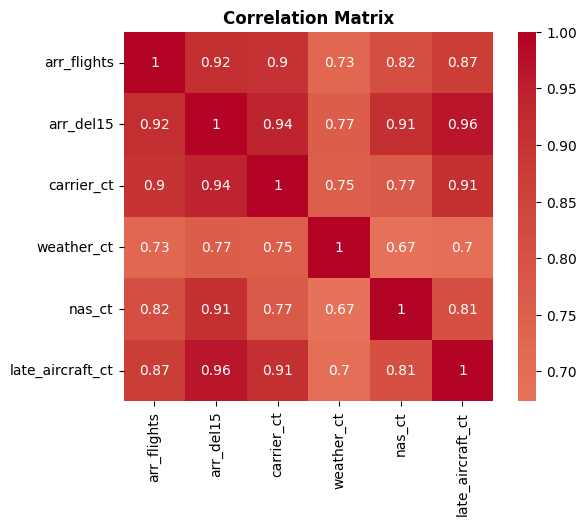

In [155]:
# 8. Correlation Matrix

correlation_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix', fontsize=12, fontweight='bold')

# 11. Flight Volume vs Delay Rate

Text(0.5, 1.0, 'Flight Volume vs Delay Rate')

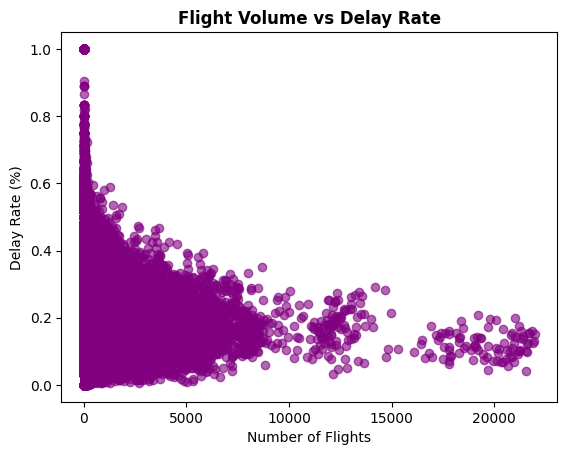

In [156]:
# 9. Flight Volume vs Delay Rate

plt.scatter(df['arr_flights'], df['delay_rate'], alpha=0.6, color='purple')
plt.xlabel('Number of Flights')
plt.ylabel('Delay Rate (%)')
plt.title('Flight Volume vs Delay Rate', fontsize=12, fontweight='bold')

# 11. Average Delay Time per Flight

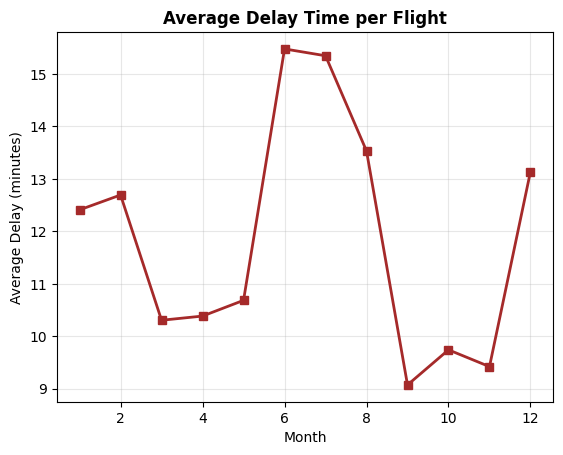

In [157]:
# 11. Average Delay Time per Flight

monthly_avg_delay = df.groupby('month')['avg_delay_per_flight'].mean()
plt.plot(monthly_avg_delay.index, monthly_avg_delay.values, marker='s', color='brown', linewidth=2)
plt.title('Average Delay Time per Flight', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(alpha=0.3)

# 14. Controllable vs Uncontrollable Delay

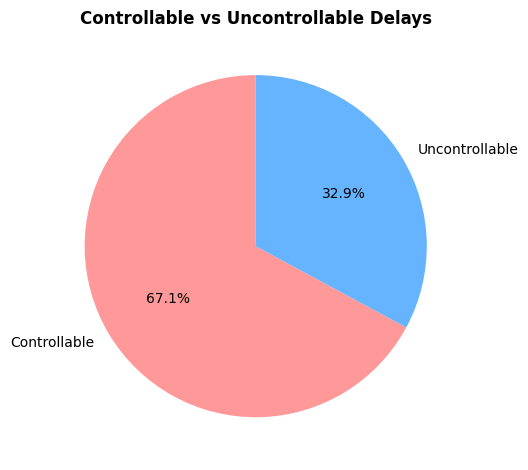

In [158]:
# 12. Controllable vs Uncontrollable Delay Breakdown


# Categorize delays
controllable = df['carrier_ct'] + df['late_aircraft_ct']
uncontrollable = df['weather_ct'] + df['nas_ct'] + df['security_ct']

# Prepare labels and values
labels = ['Controllable', 'Uncontrollable']
delay_totals = [controllable.sum(), uncontrollable.sum()]
colors = ['#ff9999', '#66b3ff']

# Plot pie chart
plt.pie(delay_totals, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Controllable vs Uncontrollable Delays', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

 # Overall flight statistics

In [159]:
 # Overall flight statistics
total_flights = df['arr_flights'].sum()
total_delays = df['arr_del15'].sum()
delay_rate = (total_delays / total_flights) * 100


In [160]:
print(f" OVERALL STATS:")
print(f"    Total flights analyzed: {total_flights:,}")
print(f"    Delayed flights: {total_delays:,}")
print(f"    Overall delay rate: {delay_rate:.2f}%")

 OVERALL STATS:
    Total flights analyzed: 58,676,070.0
    Delayed flights: 10,494,073.0
    Overall delay rate: 17.88%


In [161]:
# Best and worst delay months
monthly_delay = df.groupby('month')['delay_rate'].mean().sort_values(ascending=False)
best_month = monthly_delay.index[-1]
worst_month = monthly_delay.index[0]


In [162]:
import calendar
print(f" SEASONAL PATTERNS:")
print(f"   • Month with highest average delay: {calendar.month_name[worst_month]} ({monthly_delay.iloc[0]:.2f}%)")
print(f"   • Month with lowest average delay: {calendar.month_name[best_month]} ({monthly_delay.iloc[-1]:.2f}%)")


 SEASONAL PATTERNS:
   • Month with highest average delay: July (0.22%)
   • Month with lowest average delay: September (0.15%)


In [163]:
# Best and worst performing carriers
carrier_performance = df.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False)
worst_carrier = carrier_performance.index[0]
best_carrier = carrier_performance.index[-1]

print(f" CARRIER PERFORMANCE:")
print(f"   • Most delay-prone carrier: {worst_carrier} ({carrier_performance.iloc[0]:.2f}%)")
print(f"   • Most reliable carrier: {best_carrier} ({carrier_performance.iloc[-1]:.2f}%)")


 CARRIER PERFORMANCE:
   • Most delay-prone carrier: Peninsula Airways Inc. (0.32%)
   • Most reliable carrier: Cape Air (0.08%)


In [164]:
# Breakdown of delay causes
delay_breakdown = {
        'Carrier': df['carrier_ct'].sum(),
        'Weather': df['weather_ct'].sum(),
        'NAS': df['nas_ct'].sum(),
        'Security': df['security_ct'].sum(),
        'Late Aircraft': df['late_aircraft_ct'].sum()
    }
main_cause = max(delay_breakdown, key=delay_breakdown.get)

print(f" DELAY CAUSES:")
print(f"   • Leading cause of delays: {main_cause} ({delay_breakdown[main_cause]:,} delays)")


 DELAY CAUSES:
   • Leading cause of delays: Late Aircraft (3,719,285.1100000003 delays)


In [165]:
 # Operational control analysis
controllable_total = delay_breakdown['Carrier'] + delay_breakdown['Late Aircraft']
uncontrollable_total = delay_breakdown['Weather'] + delay_breakdown['NAS'] + delay_breakdown['Security']
controllable_pct = (controllable_total / (controllable_total + uncontrollable_total)) * 100
print(f" OPERATIONAL CONTROL:")
print(f"    Controllable delays: {controllable_pct:.1f}%")
print(f"    Uncontrollable delays: {100 - controllable_pct:.1f}%")

 OPERATIONAL CONTROL:
    Controllable delays: 67.1%
    Uncontrollable delays: 32.9%


# Feature engineering

In [166]:
df_clean = df.copy()

# 1. Core performance metrics
df_clean['delay_rate'] = df_clean['arr_del15'] / df_clean['arr_flights']
df_clean['avg_delay'] = df_clean['arr_delay'] / df_clean['arr_flights']


In [167]:
# 2. Simplified delay cause ratios
total_causes = (
    df_clean['carrier_ct'] +
    df_clean['weather_ct'] +
    df_clean['nas_ct'] +
    df_clean['security_ct'] +
    df_clean['late_aircraft_ct']
) + 1e-6  # avoid division by zero

df_clean['carrier_prop'] = df_clean['carrier_ct'] / total_causes
df_clean['weather_prop'] = df_clean['weather_ct'] / total_causes

In [168]:
# 4. Target variables
df_clean['is_delayed'] = (df_clean['arr_del15'] > 0).astype(int)
df_clean['target_delay'] = df_clean['avg_delay']


In [169]:
# 5. Historical performance features (carrier and airport)
df_clean['carrier_his'] = df_clean.groupby('carrier')['delay_rate'].transform('mean')
df_clean['airport_his'] = df_clean.groupby('airport')['delay_rate'].transform('mean')


In [170]:
from sklearn.preprocessing import LabelEncoder
# 5. Encode categorical variables
le_carrier = LabelEncoder()
df_clean['carrier_encoded'] = le_carrier.fit_transform(df_clean['carrier'])

le_airport = LabelEncoder()
df_clean['airport_encoded'] = le_airport.fit_transform(df_clean['airport'])

In [171]:
features= ['month', 'carrier_encoded', 'airport_encoded','arr_flights', 'arr_cancelled', 'arr_diverted']
target= 'is_delayed'

x = df_clean[features]
y = df_clean[target]


In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

Data Balancing

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data (existing)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#Classification model

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [175]:
y_pred =  rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:, 1]

Accuracy: 0.9498181818181818
Precision: 0.9796106131655488
Recall: 0.9675499794805652
F1 Score: 0.973542944785276
ROC AUC: 0.9346907349197204
Confusion Matrix:
 [[  949   687]
 [ 1107 33007]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.58      0.51      1636
           1       0.98      0.97      0.97     34114

    accuracy                           0.95     35750
   macro avg       0.72      0.77      0.74     35750
weighted avg       0.96      0.95      0.95     35750



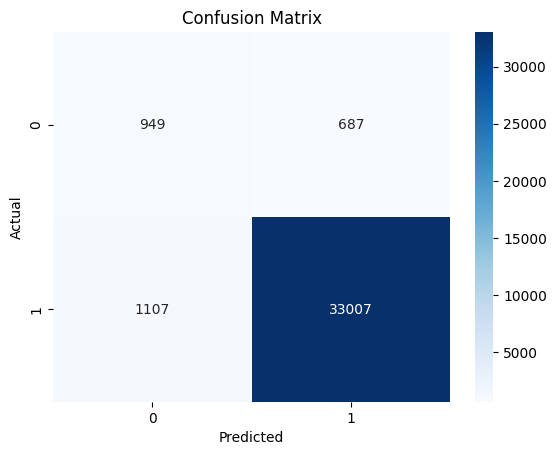

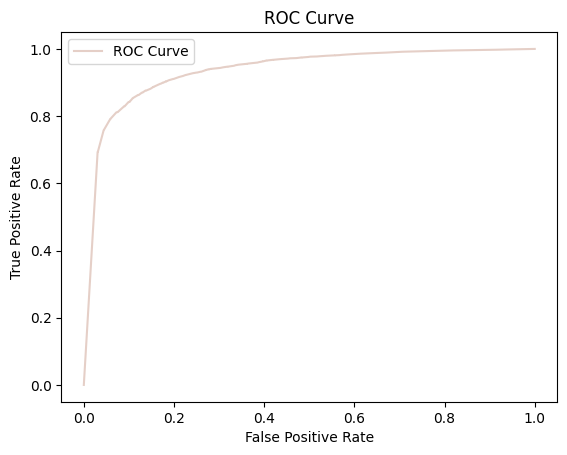

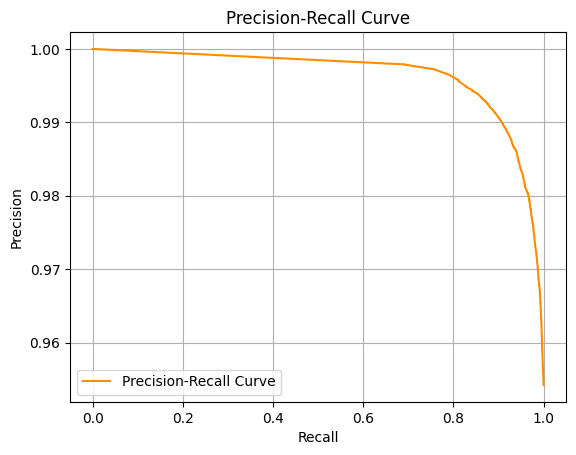

In [176]:
from sklearn.metrics import precision_recall_curve , accuracy_score , precision_score, f1_score,recall_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, label='Precision-Recall Curve', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

#Linear Regression

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

# Example features and target
#X = df_processed.drop(columns=['target_delay_duration'])  # drop target column
y_lr = df_clean['target_delay']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y_lr, test_size=0.2, random_state=42)

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print("Linear Regression Results:")
print(f"  • Mean Absolute Error (MAE): {mae:.2f}")
print(f"  • Mean Squared Error (MSE): {mse:.2f}")
print(f"  • R-squared Score (R²): {r2:.2f}")


Linear Regression Results:
  • Mean Absolute Error (MAE): 7.20
  • Mean Squared Error (MSE): 236.01
  • R-squared Score (R²): 0.00


In [179]:
pip install shap

#XGBoost Regressor +SHAP Explainability


📌 Mean Absolute Error (MAE): 67.65 minutes
📌 Root Mean Squared Error (RMSE): 91.80 minutes
📌 R^2 Score: 0.71


 99%|===================| 12440/12549 [01:10<00:00]       

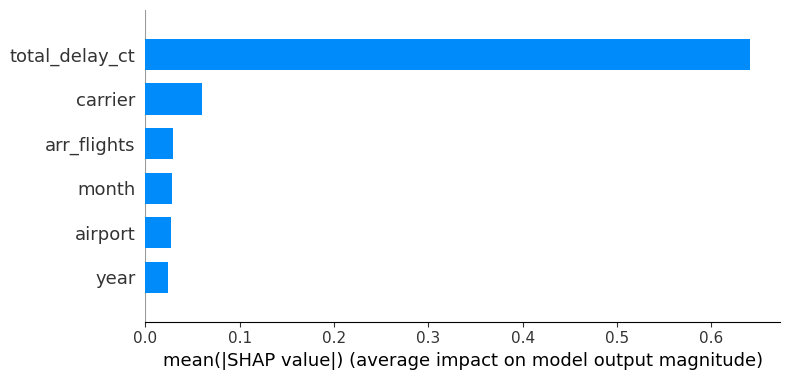

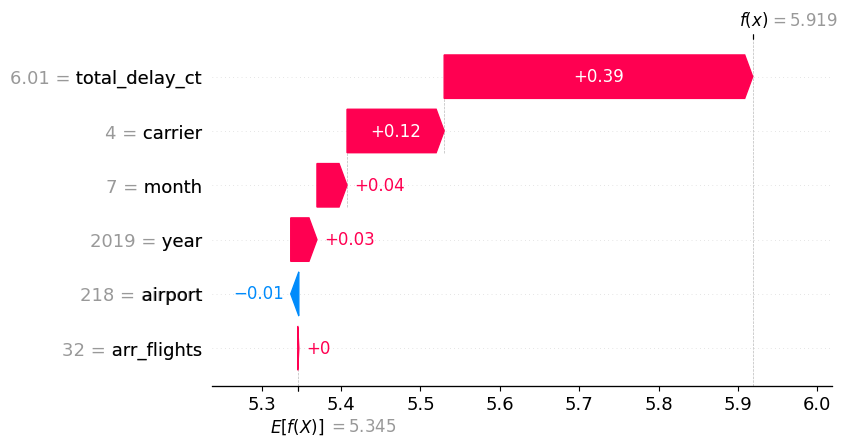

 High-error predictions (>30 min): 4545


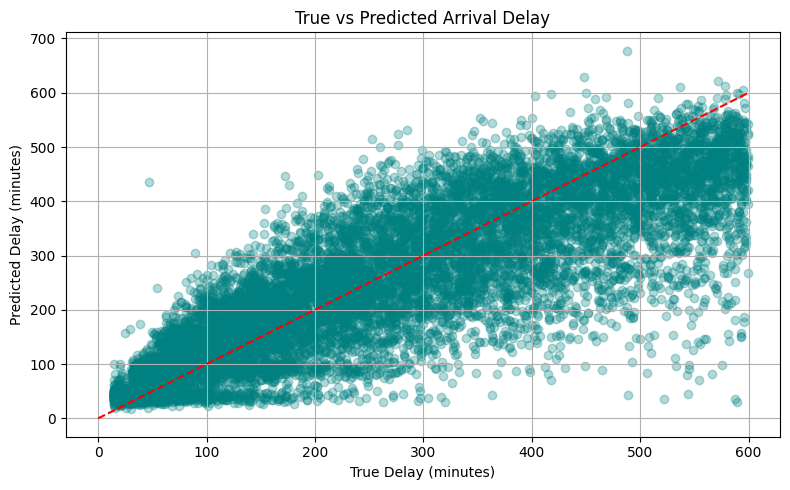

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import shap
import warnings
warnings.filterwarnings("ignore")



# Drop rows with NaNs and focus on delays > 0
df_clean = df_clean[df_clean['arr_delay'].notna()]
df_clean= df_clean[df_clean['arr_delay'] > 0]
df_clean = df_clean[df_clean['arr_delay'] < 600]  # Remove extreme delays > 10 hrs


df_clean['total_delay_ct'] = df_clean[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum(axis=1)

# Select Features for Regression
features = ['year', 'month', 'carrier', 'airport', 'arr_flights', 'total_delay_ct']
df_clean['carrier'] = df_clean['carrier'].astype('category').cat.codes
df_clean['airport'] = df_clean['airport'].astype('category').cat.codes

X = df_clean[features]
y = np.log1p(df_clean['arr_delay'])  # Log transform target


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#  Train the Model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

#  Predict
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

#  Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"\n Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f" R^2 Score: {r2:.2f}")

#  SHAP Explainability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Waterfall for One Prediction
shap.plots.waterfall(shap_values[0])

#  OAI Impact Evaluation on High-Error Predictions
residual = y_true - y_pred
high_error = residual > 30  # 30 min threshold
print(f" High-error predictions (>30 min): {high_error.sum()}")
#print(f"Mean OAI of these: {oai_test[high_error].mean():.2f}")

#  Plot True vs Predicted Delay
plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, alpha=0.3, color='teal')
plt.plot([0, max(y_true)], [0, max(y_true)], color='red', linestyle='--')
plt.xlabel("True Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("True vs Predicted Arrival Delay")
plt.grid(True)
plt.tight_layout()
plt.show()


#OAI(Operational Adjustability Index)

In [181]:
# Define OAI weights for each delay type
oai_weights = {
    'carrier': 0.7,
    'late_aircraft': 0.8,
    'nas': 0.3,
    'weather': 0.1,
    'security': 0.2
}

# Calculate weighted delay count per flight
oai_score = (
    df_clean['carrier_ct'] * oai_weights['carrier'] +
    df_clean['late_aircraft_ct'] * oai_weights['late_aircraft'] +
    df_clean['nas_ct'] * oai_weights['nas'] +
    df_clean['weather_ct'] * oai_weights['weather'] +
    df_clean['security_ct'] * oai_weights['security']
) / df_clean['arr_flights']

df_clean['oai_score'] = oai_score

# Calculate weighted delay duration per flight
oai_duration = (
    df_clean['carrier_delay'] * oai_weights['carrier'] +
    df_clean['late_aircraft_delay'] * oai_weights['late_aircraft'] +
    df_clean['nas_delay'] * oai_weights['nas'] +
    df_clean['weather_delay'] * oai_weights['weather'] +
    df_clean['security_delay'] * oai_weights['security']
) / df_clean['arr_flights']

df_clean['oai_weighted_duration'] = oai_duration

# Print key statistics
print("\nOAI Weights Used:")
for k, v in oai_weights.items():
    print(f"  • {k.title()}: {v}")

print("\ OAI Score Summary:")
print(f"  • Mean Score     : {df_clean['oai_score'].mean():.4f}")
print(f"  • Std Deviation  : {df_clean['oai_score'].std():.4f}")
print(f"  • Max Score      : {df_clean['oai_score'].max():.4f}")



OAI Weights Used:
  • Carrier: 0.7
  • Late_Aircraft: 0.8
  • Nas: 0.3
  • Weather: 0.1
  • Security: 0.2
\ OAI Score Summary:
  • Mean Score     : 0.0902
  • Std Deviation  : 0.0813
  • Max Score      : 0.8000


In [182]:
# Assuming `y_true` = actual delay durations and `y_pred` = predicted values from regression model
mse = np.mean((y_true - y_pred) ** 2)
oai_penalty = np.mean(np.maximum(0, y_true - y_pred) ** 2)
oai_loss = mse + 0.5 * oai_penalty

print(f" OAI-Aware Loss Evaluation:")
print(f"  • MSE: {mse:.4f}")
print(f"  • OAI Penalty: {oai_penalty:.4f}")
print(f"  • Combined OAI Loss: {oai_loss:.4f}")


 OAI-Aware Loss Evaluation:
  • MSE: 8427.3265
  • OAI Penalty: 6135.8885
  • Combined OAI Loss: 11495.2708
